In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('全國4大超商資料集.csv',encoding = 'utf-8')
df = df[df.分公司狀態 == 1].drop_duplicates(subset=['分公司地址']).reset_index(drop=True)

display(df.head())
df.describe()

,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態
0,22555003,統一超商股份有限公司,1846195,台北市第一七０分公司,臺北市士林區文林路一六九號一樓,1
1,22555003,統一超商股份有限公司,16080140,台北巿第三四二分公司,臺北市松山區健康路224號１樓,1
2,22555003,統一超商股份有限公司,16080161,台北縣第２５６分公司,新北市三峽區鳶山里十二鄰中山路１８６號１樓,1
3,22555003,統一超商股份有限公司,16080177,新竹市第２６分公司,新竹市民富里７鄰北大路３４２號,1
4,22555003,統一超商股份有限公司,16080253,高雄巿第１５２分公司,高雄市小港區鳳源里鳳林路181、183號1樓,1


,公司統一編號,分公司統一編號,分公司狀態
count,1.058200e+04,1.058200e+04,10582.0
mean,2.280443e+07,4.779988e+07,1.0
std,2.805203e+05,2.266141e+07,0.0
min,2.255500e+07,1.582573e+06,1.0
25%,2.255500e+07,2.792567e+07,1.0
50%,2.255500e+07,5.179486e+07,1.0
75%,2.306025e+07,5.491913e+07,1.0
max,2.328558e+07,9.747745e+07,1.0


In [0]:
#全台便利商店
df['縣市'] = df['分公司地址'].str[:3]
df['縣市'] = df['縣市'].str.replace('巿','市')
for i in range(df.shape[0]):
    if df.loc[i, '縣市'] == '台北市':
        df.loc[i, '縣市'] = '臺北市'
    if df.loc[i, '縣市'] == '臺北縣' or df.loc[i, '縣市'] == '台北縣':
        df.loc[i, '縣市'] = '新北市'
    if df.loc[i, '縣市'] == '桃園縣':
        df.loc[i, '縣市'] = '桃園市'
    if df.loc[i, '縣市'] == '臺中縣':
        df.loc[i, '縣市'] = '臺中市'
    if df.loc[i, '縣市'] == '臺南縣':
        df.loc[i, '縣市'] = '臺南市'
    if df.loc[i, '縣市'] == '高雄縣':
        df.loc[i, '縣市'] = '高雄市'
    if df.loc[i, '縣市'] == '苗栗市':
        df.loc[i, '縣市'] = '苗栗縣'
    if df.loc[i, '縣市'] == '彰化市':
        df.loc[i, '縣市'] = '彰化縣'
#display(df['縣市'])
total = df['縣市'].value_counts().rename_axis('縣市').reset_index(name = '便利商店')
#display(total)
print(df['公司名稱'].value_counts())

統一超商股份有限公司      5609
全家便利商店股份有限公司    3020
萊爾富國際股份有限公司     1228
來來超商股份有限公司       725
Name: 公司名稱, dtype: int64


In [0]:
unemp = pd.read_excel('107各地失業率.xlsx')
#display(unemp)

total = unemp.merge(total ,how = 'left' ,left_on = '縣市' ,right_on = '縣市')

seven = df[df.公司名稱 == '統一超商股份有限公司'].reset_index(drop=True)
total = total.merge(seven['縣市'].value_counts().rename_axis('縣市').reset_index(name = '7-11') ,how = 'left' ,left_on = '縣市' ,right_on = '縣市')
total['7-11'] = total['7-11'] / total['便利商店']

OK = df[df.公司名稱 == '來來超商股份有限公司'].reset_index(drop=True)
total = total.merge(OK['縣市'].value_counts().rename_axis('縣市').reset_index(name = 'OK') ,how = 'left' ,left_on = '縣市' ,right_on = '縣市').fillna(0)
total['OK'] = total['OK'] / total['便利商店']

family = df[df.公司名稱 == '全家便利商店股份有限公司'].reset_index(drop=True)
total = total.merge(family['縣市'].value_counts().rename_axis('縣市').reset_index(name = 'Family') ,how = 'left' ,left_on = '縣市' ,right_on = '縣市').fillna(0)
total['Family'] = total['Family'] / total['便利商店']

hi = df[df.公司名稱 == '萊爾富國際股份有限公司'].reset_index(drop=True)
total = total.merge(hi['縣市'].value_counts().rename_axis('縣市').reset_index(name = 'Hi-Life') ,how = 'left' ,left_on = '縣市' ,right_on = '縣市').fillna(0)
total['Hi-Life'] = total['Hi-Life'] / total['便利商店']

display(total)
#total.plot.scatter(x = '107年平均', y = '便利商店')

counemp = total['107年平均'].corr(total['便利商店'])
print('Correlation between unemployment rate and proportion of convenience store = ', counemp)
counemp711 = total['107年平均'].corr(total['7-11'])
print('Correlation between unemployment rate and proportion of 7-11 = ', counemp711)
counempOK = total['107年平均'].corr(total['OK'])
print('Correlation between unemployment rate and proportion of OK = ', counempOK)
counempf = total['107年平均'].corr(total['Family'])
print('Correlation between unemployment rate and proportion of Family Mart = ', counempf)
counemphi = total['107年平均'].corr(total['Hi-Life'])
print('Correlation between unemployment rate and proportion of Hi-Life = ', counemphi)

,縣市,107年平均,便利商店,7-11,OK,Family,Hi-Life
0,新北市,3.7,2164,0.448244,0.067006,0.347043,0.137708
1,臺北市,3.7,1566,0.519157,0.050447,0.322478,0.107918
2,桃園市,3.8,1242,0.492754,0.097424,0.217391,0.192432
3,臺中市,3.7,1281,0.534738,0.076503,0.312256,0.076503
4,臺南市,3.8,664,0.695783,0.009036,0.230422,0.064759
5,高雄市,3.7,963,0.585670,0.048806,0.263759,0.101765
6,宜蘭縣,3.8,184,0.532609,0.108696,0.288043,0.070652
7,新竹縣,3.7,328,0.490854,0.115854,0.219512,0.173780
8,苗栗縣,3.7,233,0.506438,0.077253,0.274678,0.141631
9,彰化縣,3.6,351,0.572650,0.111111,0.205128,0.111111


Correlation between unemployment rate and proportion of convenience store =  0.3777250668969862
Correlation between unemployment rate and proportion of 7-11 =  -0.47536054714688264
Correlation between unemployment rate and proportion of OK =  0.3293409147065532
Correlation between unemployment rate and proportion of Family Mart =  -0.2237122754076664
Correlation between unemployment rate and proportion of Hi-Life =  0.5374698583838691


In [0]:
une = pd.DataFrame(columns = ['失業率', '7-11', 'OK', 'Family', 'Hi-Life'])
for i in total['107年平均'].unique():
    s = 0
    o = 0
    f = 0
    h = 0
    for j in range(total.shape[0]):
        if total.loc[j, '107年平均'] == i:
            s += total.loc[j, '7-11'] * total.loc[j, '便利商店']
            o += total.loc[j, 'OK'] * total.loc[j, '便利商店']
            f += total.loc[j, 'Family'] * total.loc[j, '便利商店']
            h += total.loc[j, 'Hi-Life'] * total.loc[j, '便利商店']
    une = une.append({'失業率': i, '7-11': s, 'OK': o, 'Family': f, 'Hi-Life': h}, ignore_index = True)
une = une.set_index('失業率')
display(une)

,7-11,OK,Family,Hi-Life
失業率,,,,
3.7,3861.0,528.0,2315.0,867.0
3.8,1172.0,147.0,476.0,295.0
3.6,403.0,50.0,163.0,64.0
3.5,143.0,0.0,62.0,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E6D9F2E48>,
      dtype=object)

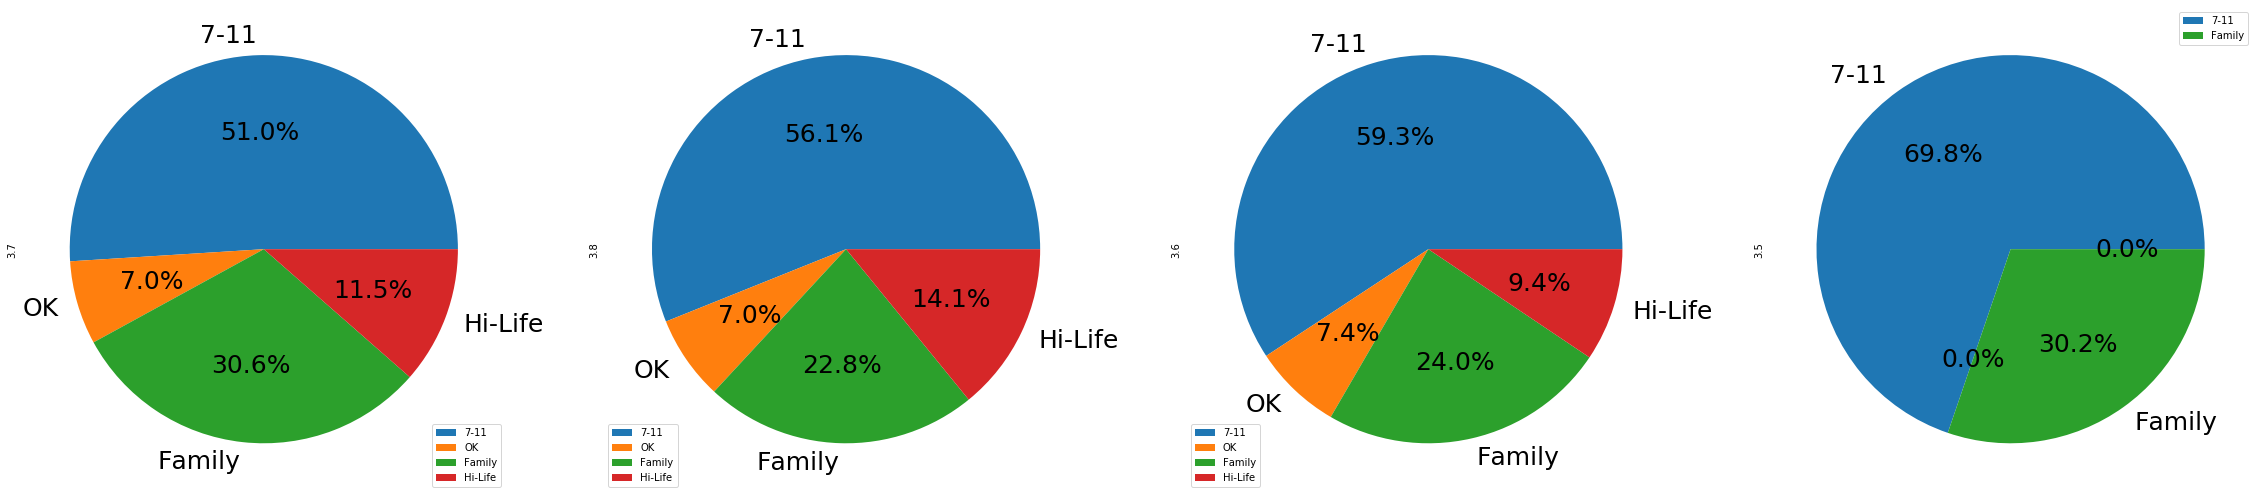

In [0]:
une.T.plot.pie(subplots=True, figsize=(40, 25), autopct='%1.1f%%', fontsize=25)